In [41]:
import os
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None

[External Data 1](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE144240)

In [6]:
!tar -xvf data/GSE144240_RAW.tar -C data

GSM4284316_P2_ST_rep1.jpg.gz
GSM4284316_P2_ST_rep1_stdata.tsv.gz
GSM4284316_spot_data-selection-P2_ST_rep1.tsv.gz
GSM4284317_P2_ST_rep2.jpg.gz
GSM4284317_P2_ST_rep2_stdata.tsv.gz
GSM4284317_spot_data-selection-P2_ST_rep2.tsv.gz
GSM4284318_P2_ST_rep3.jpg.gz
GSM4284318_P2_ST_rep3_stdata.tsv.gz
GSM4284318_spot_data-selection-P2_ST_rep3.tsv.gz
GSM4284319_P5_ST_rep1.jpg.gz
GSM4284319_P5_ST_rep1_stdata.tsv.gz
GSM4284319_spot_data-selection-P5_ST_rep1.tsv.gz
GSM4284320_P5_ST_rep2.jpg.gz
GSM4284320_P5_ST_rep2_stdata.tsv.gz
GSM4284320_spot_data-selection-P5_ST_rep2.tsv.gz
GSM4284321_P5_ST_rep3.jpg.gz
GSM4284321_P5_ST_rep3_stdata.tsv.gz
GSM4284321_spot_data-selection-P5_ST_rep3.tsv.gz
GSM4284322_P9_ST_rep1.jpg.gz
GSM4284322_P9_ST_rep1_stdata.tsv.gz
GSM4284322_spot_data-selection-P9_ST_rep1.tsv.gz
GSM4284323_P9_ST_rep2.jpg.gz
GSM4284323_P9_ST_rep2_stdata.tsv.gz
GSM4284323_spot_data-selection-P9_ST_rep2.tsv.gz
GSM4284324_P9_ST_rep3.jpg.gz
GSM4284324_P9_ST_rep3_stdata.tsv.gz
GSM4284324_spot_data-se

In [8]:
!gunzip data/GSM4284316_P2_ST_rep1.jpg.gz
!gunzip data/GSM4284316_spot_data-selection-P2_ST_rep1.tsv.gz

gzip: data is a directory -- ignored


In [50]:
df = pd.read_csv('data/GSM4284316_spot_data-selection-P2_ST_rep1.tsv', sep = "\t")
df.head()

In [51]:
img = Image.open('data/GSM4284316_P2_ST_rep1.jpg')
print(img.size)
resized_img = img.resize((int(img.size[0] * 0.125), int(img.size[1] * 0.125)))
del img

,x,y,new_x,new_y,pixel_x,pixel_y
0,7,45,6.98,44.94,3282.6,9536.7
1,8,30,8.04,29.98,3473.4,6539.5
2,8,32,8.03,31.97,3471.9,6937.9
3,8,34,8.04,33.97,3474.1,7338.8
4,8,36,8.01,35.96,3469.5,7736.4
...,...,...,...,...,...,...
661,49,41,48.90,41.06,10850.2,8757.7
662,49,43,48.97,43.04,10861.3,9155.9
663,49,45,48.91,45.05,10850.9,9557.6
664,50,42,49.98,42.05,11044.2,8956.9


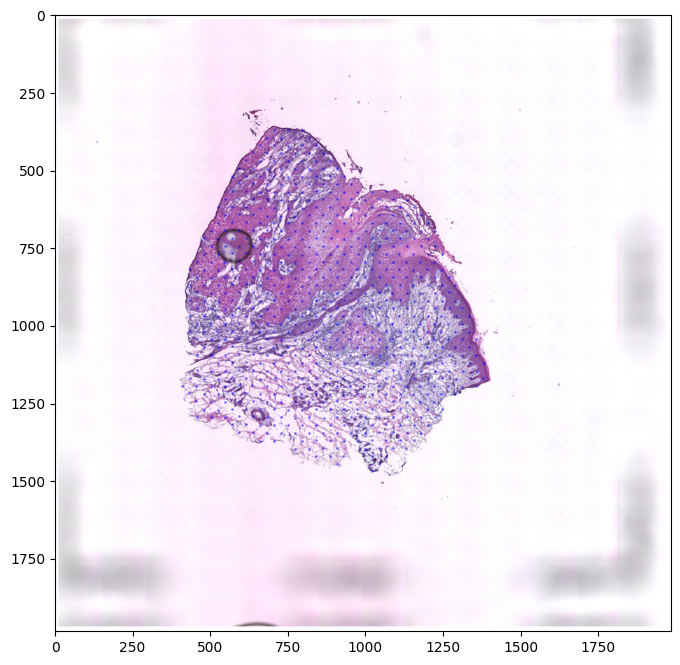

In [59]:
plt.figure(figsize = (8, 8))
plt.imshow(resized_img)
plt.scatter(df['pixel_x'] * 0.125, df['pixel_y'] * 0.125, color="blue", s=1, alpha=0.4)
plt.show()

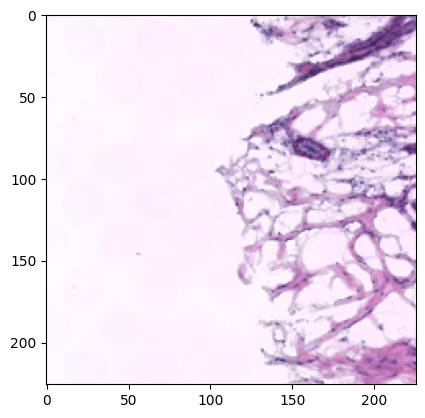

In [61]:
plt.imshow(resized_img.crop(
    (int(df.iloc[0]['pixel_x'] * 0.125 - 113), int(df.iloc[0]['pixel_y'] * 0.125 - 113), 
     int(df.iloc[0]['pixel_x'] * 0.125) + 113, int(df.iloc[0]['pixel_y'] * 0.125) + 113)))
plt.show()

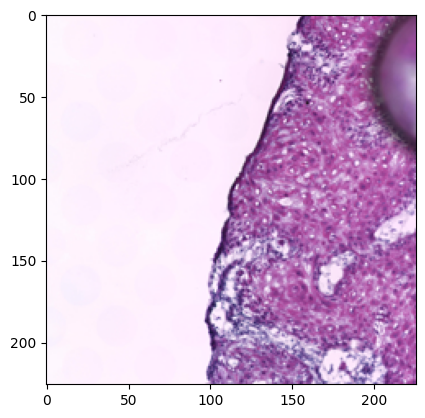

In [62]:
plt.imshow(resized_img.crop(
    (int(df.iloc[1]['pixel_x'] * 0.125 - 113), int(df.iloc[1]['pixel_y'] * 0.125 - 113), 
     int(df.iloc[1]['pixel_x'] * 0.125) + 113, int(df.iloc[1]['pixel_y'] * 0.125) + 113)))
plt.show()

In [63]:
resized_img.save('data/GSM4284316.jpg')
(df[['pixel_x', 'pixel_y']] * 0.125).to_pickle('data/GSM4284316.pkl')
os.remove('data/GSM4284316_P2_ST_rep1.jpg')
os.remove('data/GSM4284316_spot_data-selection-P2_ST_rep1.tsv')

In [68]:
import glob
import gzip
import shutil
def decompress_gz(gz_path, out_path):
    with gzip.open(gz_path, 'rb') as f_in, open(out_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [69]:
for i in glob.glob('data/*.jpg.gz'):
    decompress_gz(i, i[:-3])

In [70]:
for i in glob.glob('data/*.jpg.gz'):
    os.remove(i)

In [74]:
for i in glob.glob('data/*_ST_rep*.jpg'):
    img = Image.open(i)
    print(i, i.split('_')[0] + '.jpg', img.size)
    img = img.resize((int(img.size[0] * 0.125), int(img.size[1] * 0.125)))
    img.save(i.split('_')[0] + '.jpg')
del img

data/GSM4284317_P2_ST_rep2.jpg data/GSM4284317.jpg (15872, 15872)
data/GSM4284318_P2_ST_rep3.jpg data/GSM4284318.jpg (15872, 15872)
data/GSM4284319_P5_ST_rep1.jpg data/GSM4284319.jpg (15872, 15872)
data/GSM4284320_P5_ST_rep2.jpg data/GSM4284320.jpg (15872, 15872)
data/GSM4284321_P5_ST_rep3.jpg data/GSM4284321.jpg (15872, 15872)
data/GSM4284322_P9_ST_rep1.jpg data/GSM4284322.jpg (15872, 15872)
data/GSM4284323_P9_ST_rep2.jpg data/GSM4284323.jpg (15872, 15872)
data/GSM4284324_P9_ST_rep3.jpg data/GSM4284324.jpg (15872, 15872)
data/GSM4284325_P10_ST_rep1.jpg data/GSM4284325.jpg (15872, 15872)
data/GSM4284326_P10_ST_rep2.jpg data/GSM4284326.jpg (15872, 15872)
data/GSM4284327_P10_ST_rep3.jpg data/GSM4284327.jpg (15872, 15872)


In [75]:
for i in glob.glob('data/*_ST_rep*.jpg'):
    os.remove(i)

In [ ]:
df = pd.read_csv('data/GSM4284316_spot_data-selection-P2_ST_rep1.tsv', sep = "\t")
(df[['pixel_x', 'pixel_y']] * 0.125).to_pickle('data/GSM4284316.pkl')

In [77]:
for i in glob.glob('data/*_spot_data*.tsv.gz'):
    decompress_gz(i, i[:-3])

In [78]:
for i in glob.glob('data/*_spot_data*.tsv.gz'):
    os.remove(i)

In [81]:
for i in glob.glob('data/*_spot_data*.tsv'):
    print(i, i.split('_')[0] + '.pkl')
    df = pd.read_csv(i, sep = "\t")
    (df[['pixel_x', 'pixel_y']] * 0.125).to_pickle(i.split('_')[0] + '.pkl')

data/GSM4284317_spot_data-selection-P2_ST_rep2.tsv data/GSM4284317.pkl
data/GSM4284318_spot_data-selection-P2_ST_rep3.tsv data/GSM4284318.pkl
data/GSM4284319_spot_data-selection-P5_ST_rep1.tsv data/GSM4284319.pkl
data/GSM4284320_spot_data-selection-P5_ST_rep2.tsv data/GSM4284320.pkl
data/GSM4284321_spot_data-selection-P5_ST_rep3.tsv data/GSM4284321.pkl
data/GSM4284322_spot_data-selection-P9_ST_rep1.tsv data/GSM4284322.pkl
data/GSM4284323_spot_data-selection-P9_ST_rep2.tsv data/GSM4284323.pkl
data/GSM4284324_spot_data-selection-P9_ST_rep3.tsv data/GSM4284324.pkl
data/GSM4284325_spot_data-selection-P10_ST_rep1.tsv data/GSM4284325.pkl
data/GSM4284326_spot_data-selection-P10_ST_rep2.tsv data/GSM4284326.pkl
data/GSM4284327_spot_data-selection-P10_ST_rep3.tsv data/GSM4284327.pkl


In [83]:
for i in glob.glob('data/*_spot_data*.tsv'):
    os.remove(i)

In [84]:
for i in glob.glob('data/*.tsv.gz'):
    os.remove(i)

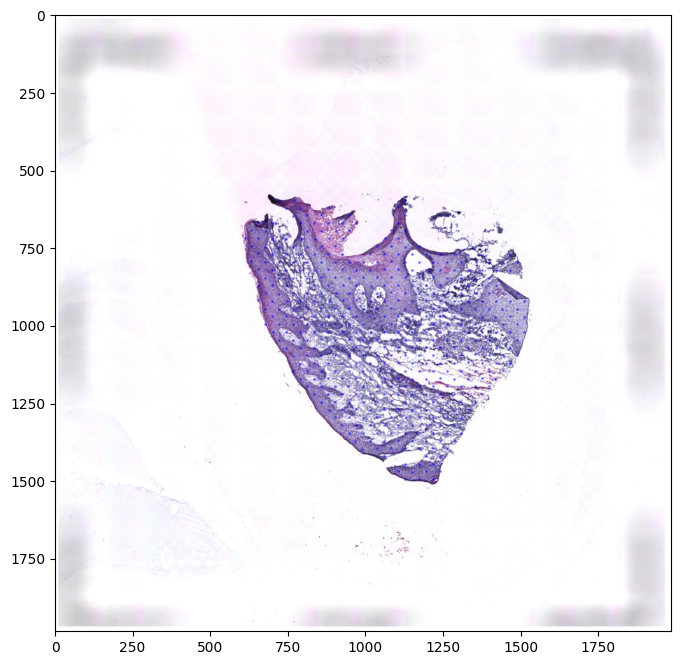

In [86]:
img = Image.open('data/GSM4284327.jpg')
df = pd.read_pickle('data/GSM4284327.pkl')
plt.figure(figsize = (8, 8))
plt.imshow(img)
plt.scatter(df['pixel_x'], df['pixel_y'], color="blue", s=1, alpha=0.4)
plt.show()

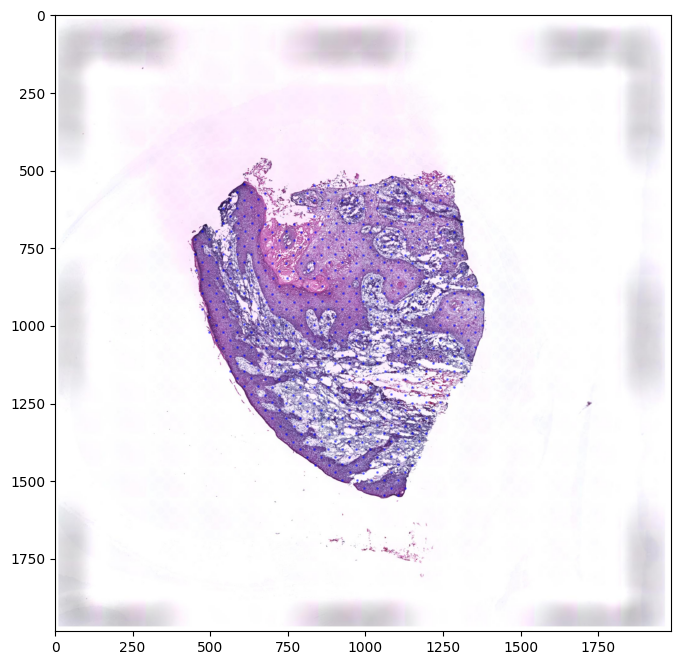

In [87]:
img = Image.open('data/GSM4284326.jpg')
df = pd.read_pickle('data/GSM4284326.pkl')
plt.figure(figsize = (8, 8))
plt.imshow(img)
plt.scatter(df['pixel_x'], df['pixel_y'], color="blue", s=1, alpha=0.4)
plt.show()